<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Pattern Recognition
The purpose of this project is analyze the asl_dataset from kaggle
https://www.kaggle.com/datasets/ayuraj/asl-dataset

Using a Convolutional Neural Networks,

Here a some courses and documentattion that i took to learn more about the CNNs
https://www.tensorflow.org/tutorials/keras/classification
https://learning.oreilly.com/course/deep-learning-/9781801076272/



In [182]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [183]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [184]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [185]:
#Cambiar directorio default de python
import os
os.chdir("/content/gdrive/MyDrive/asl_dataset")

In [186]:
!ls

0  2  4  6  8  a  c  e	g  i  k  m  o  q  s  u	w  y
1  3  5  7  9  b  d  f	h  j  l  n  p  r  t  v	x  z


As you can see in the previous code of block, there are folders with each character of asl:
* from 0 to 9
* from a -z


Lets explore our dataset

In [187]:
os.chdir('/content/gdrive/MyDrive/asl_dataset/0')

In [188]:
!pwd

/content/gdrive/MyDrive/asl_dataset/0


In [189]:
!ls

hand1_0_bot_seg_1_cropped.jpeg	  hand2_0_left_seg_1_cropped.jpeg
hand1_0_bot_seg_2_cropped.jpeg	  hand2_0_left_seg_2_cropped.jpeg
hand1_0_bot_seg_3_cropped.jpeg	  hand2_0_left_seg_3_cropped.jpeg
hand1_0_bot_seg_4_cropped.jpeg	  hand2_0_left_seg_4_cropped.jpeg
hand1_0_bot_seg_5_cropped.jpeg	  hand2_0_left_seg_5_cropped.jpeg
hand1_0_dif_seg_1_cropped.jpeg	  hand2_0_right_seg_1_cropped.jpeg
hand1_0_dif_seg_2_cropped.jpeg	  hand2_0_right_seg_2_cropped.jpeg
hand1_0_dif_seg_3_cropped.jpeg	  hand2_0_right_seg_3_cropped.jpeg
hand1_0_dif_seg_4_cropped.jpeg	  hand2_0_right_seg_4_cropped.jpeg
hand1_0_dif_seg_5_cropped.jpeg	  hand2_0_right_seg_5_cropped.jpeg
hand1_0_left_seg_1_cropped.jpeg   hand2_0_top_seg_1_cropped.jpeg
hand1_0_left_seg_2_cropped.jpeg   hand2_0_top_seg_2_cropped.jpeg
hand1_0_left_seg_3_cropped.jpeg   hand2_0_top_seg_3_cropped.jpeg
hand1_0_left_seg_4_cropped.jpeg   hand2_0_top_seg_4_cropped.jpeg
hand1_0_left_seg_5_cropped.jpeg   hand2_0_top_seg_5_cropped.jpeg
hand1_0_right_seg_1_

In [190]:
image = "hand1_0_bot_seg_1_cropped.jpeg"
image_dir = "/content/gdrive/MyDrive/asl_dataset/0"

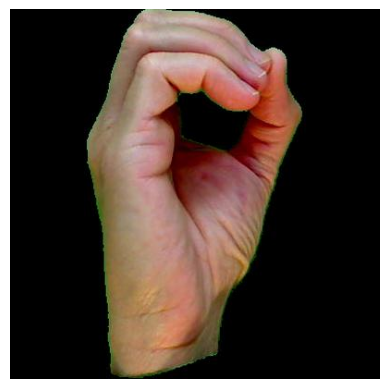

In [191]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_path = os.path.join(image_dir, image)
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # No mostrar los ejes
plt.show()

In [192]:
folder_path = '/content/gdrive/MyDrive/asl_dataset/0' # Cambia esto al directorio correcto

files = os.listdir(folder_path)


files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))] #All files

all_files = files

print(all_files)

['hand1_0_dif_seg_4_cropped.jpeg', 'hand1_0_right_seg_2_cropped.jpeg', 'hand1_0_dif_seg_5_cropped.jpeg', 'hand1_0_left_seg_4_cropped.jpeg', 'hand1_0_left_seg_3_cropped.jpeg', 'hand1_0_right_seg_3_cropped.jpeg', 'hand1_0_right_seg_4_cropped.jpeg', 'hand1_0_bot_seg_3_cropped.jpeg', 'hand1_0_dif_seg_1_cropped.jpeg', 'hand1_0_bot_seg_2_cropped.jpeg', 'hand1_0_bot_seg_5_cropped.jpeg', 'hand1_0_right_seg_1_cropped.jpeg', 'hand1_0_bot_seg_1_cropped.jpeg', 'hand1_0_bot_seg_4_cropped.jpeg', 'hand1_0_top_seg_1_cropped.jpeg', 'hand1_0_left_seg_1_cropped.jpeg', 'hand1_0_dif_seg_3_cropped.jpeg', 'hand1_0_dif_seg_2_cropped.jpeg', 'hand1_0_left_seg_5_cropped.jpeg', 'hand1_0_right_seg_5_cropped.jpeg', 'hand1_0_left_seg_2_cropped.jpeg', 'hand1_0_top_seg_2_cropped.jpeg', 'hand2_0_top_seg_1_cropped.jpeg', 'hand2_0_right_seg_5_cropped.jpeg', 'hand1_0_top_seg_3_cropped.jpeg', 'hand2_0_right_seg_2_cropped.jpeg', 'hand2_0_bot_seg_4_cropped.jpeg', 'hand2_0_left_seg_4_cropped.jpeg', 'hand2_0_top_seg_2_cropped.

## Loading all the data


In [193]:
data_path = ('/content/gdrive/MyDrive/asl_dataset')

In [194]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels='inferred',  # Las etiquetas se infieren de los nombres de las carpetas
    label_mode='int',   # Las etiquetas se cargarán como enteros inicialmente
    image_size=(256, 256),
    batch_size=32
)

Found 2515 files belonging to 36 classes.


In [195]:
data.class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [196]:
# Obtener los nombres de las clases
class_names = data.class_names

# Función para convertir etiquetas numéricas a etiquetas de texto
def decode_labels(image, label):
    label = tf.gather(class_names, label)
    return image, label

# Aplicar la función a todo el conjunto de datos
data = data.map(decode_labels)


In [197]:
data_iterator = data.as_numpy_iterator()


In [198]:
batch = data_iterator.next()

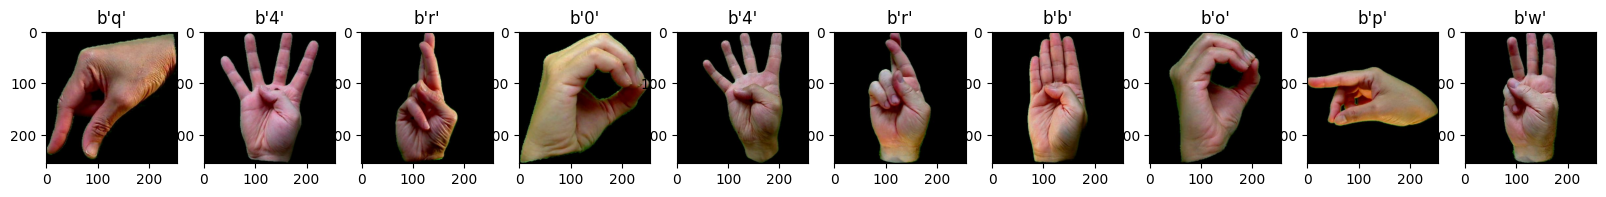

In [199]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Here is one problem of how I am loading the data.

And the prolem is that instead of using the labels, it is codign this labels.

In [200]:
batch[0]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 1.        , 0.        ],
         [0.        , 0.84375   , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 1.        , 0.        ],
         [0.        , 0.84375   , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 1.        , 0.        ],
         [0.        , 0.90722656, 0.        ],
         [0.        , 0.40625   , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [201]:
batch[1] # labels

array([b'q', b'4', b'r', b'0', b'4', b'r', b'b', b'o', b'p', b'w', b'l',
       b'p', b'g', b't', b'0', b'8', b'p', b'o', b'f', b's', b'6', b'4',
       b'r', b'q', b'8', b'o', b'v', b'k', b'h', b't', b'0', b'3'],
      dtype=object)

# Scale Data


In [202]:
#data = data.map(lambda x,y: (x/255, y))

In [203]:
#data.as_numpy_iterator().next()

In [204]:
#fig, ax = plt.subplots(ncols=10, figsize=(20,20))
#for idx, img in enumerate(batch[0][:10]):
 #   ax[idx].imshow(img.astype(float))
  #  ax[idx].title.set_text(batch[1][idx])

In [205]:
len(data)

79

# Dividing

In [206]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [207]:
# sizes
print(train_size) ## 55 *32
print(val_size) ## 15 *32
print(test_size) # 7*32

55
15
7


In [216]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [217]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

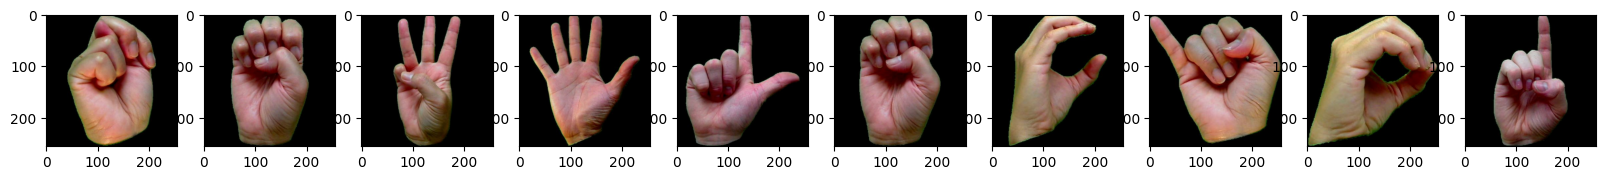

In [219]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
# Convert 'train' to an iterator to access its elements
train_iterator = train.as_numpy_iterator()
# Get the first batch of data from the iterator
train_batch = train_iterator.next()
# Iterate through the images and labels within the batch
for idx, img in enumerate(train_batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])  # this is how i can stract the labels
plt.show() # Add this line to display the plot